In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
data = keras.datasets.imdb

In [3]:
(trainx, trainy),(testx, testy) = data.load_data(num_words=10000)

In [4]:
for i in trainx[0]:
    print(i,end='  ')

1  14  22  16  43  530  973  1622  1385  65  458  4468  66  3941  4  173  36  256  5  25  100  43  838  112  50  670  2  9  35  480  284  5  150  4  172  112  167  2  336  385  39  4  172  4536  1111  17  546  38  13  447  4  192  50  16  6  147  2025  19  14  22  4  1920  4613  469  4  22  71  87  12  16  43  530  38  76  15  13  1247  4  22  17  515  17  12  16  626  18  2  5  62  386  12  8  316  8  106  5  4  2223  5244  16  480  66  3785  33  4  130  12  16  38  619  5  25  124  51  36  135  48  25  1415  33  6  22  12  215  28  77  52  5  14  407  16  82  2  8  4  107  117  5952  15  256  4  2  7  3766  5  723  36  71  43  530  476  26  400  317  46  7  4  2  1029  13  104  88  4  381  15  297  98  32  2071  56  26  141  6  194  7486  18  4  226  22  21  134  476  26  480  5  144  30  5535  18  51  36  28  224  92  25  104  4  226  65  16  38  1334  88  12  16  283  5  16  4472  113  103  32  15  16  5345  19  178  32  

In [5]:
word_dict = data.get_word_index()

In [6]:
#word-dict has a dict of word_value pairs
word_index = { k : (v+3 ) for k,v in word_dict.items() }
# the first 3 are reserved for specuial characters.

word_index["<PAD>"] = 0               #This character is to be dded to smaller reviews to get a uniform length
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2
word_index["<UNUSED>"] = 3

In [7]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])    #convert it to value-word pairs

In [8]:
def decode_text(text):
    return " ".join([reverse_word_index.get(i,'?') for i in text])

In [9]:
decode_text(testx[0])

"<START> please give this one a miss br br <UNKNOWN> <UNKNOWN> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite <UNKNOWN> so all you madison fans give this a miss"

In [10]:
#take all reviews and make length as 250 absolutely
trainx  = keras.preprocessing.sequence.pad_sequences(trainx,250,dtype=np.int64,padding='post',truncating='post',value=0 )
testx  = keras.preprocessing.sequence.pad_sequences(testx,250,dtype=np.int64,padding='post',truncating='post',value=0 )

In [11]:
for i in range(5):
    print(i+1, len(trainx[i]))

1 250
2 250
3 250
4 250
5 250


In [12]:
model = keras.Sequential()
model.add(keras.layers.Embedding(10000,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(trainx, trainy, shuffle=True, validation_split=0.3,epochs=20, workers = 4)

Epoch 1/20
547/547 [==============================] - 2s 4ms/step - loss: 0.0083 - accuracy: 0.9990 - val_loss: 0.8441 - val_accuracy: 0.8547
Epoch 2/20
547/547 [==============================] - 2s 4ms/step - loss: 0.0065 - accuracy: 0.9994 - val_loss: 0.9214 - val_accuracy: 0.8540
Epoch 3/20
547/547 [==============================] - 2s 4ms/step - loss: 0.0050 - accuracy: 0.9995 - val_loss: 0.9377 - val_accuracy: 0.8571
Epoch 4/20
547/547 [==============================] - 2s 4ms/step - loss: 0.0035 - accuracy: 0.9997 - val_loss: 0.9924 - val_accuracy: 0.8529
Epoch 5/20
547/547 [==============================] - 2s 4ms/step - loss: 0.0028 - accuracy: 0.9998 - val_loss: 1.0310 - val_accuracy: 0.8545
Epoch 6/20
547/547 [==============================] - 2s 4ms/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 1.1136 - val_accuracy: 0.8503
Epoch 7/20
547/547 [==============================] - 2s 4ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 1.1184 - val_accuracy: 0.8519
Epoch 

In [19]:
model.evaluate(testx, testy)

782/782 [==============================] - 1s 1ms/step - loss: 1.8815 - accuracy: 0.8238: 0s - loss:


[1.8814830780029297, 0.8237599730491638]

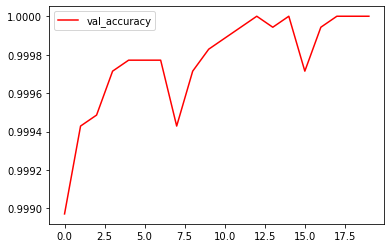

In [27]:
import matplotlib.pyplot as plt
hist = history.history.copy()
val_accuracy = hist["val_accuracy"]
plt.plot(range(len(val_accuracy)), accuracy, 'r', label="val_accuracy")
plt.legend()
plt.show()

In [28]:
# based on graphs
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(10000,16))
model2.add(keras.layers.GlobalAveragePooling1D())
model2.add(keras.layers.Dense(16,activation='relu'))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

model2.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
)

model2.summary()
print('\n\nTraining:\n')
model2.fit(trainx, trainy, shuffle=True, validation_split=0.3,epochs=6, workers = 4)
print('\n\nEvaluation:\n')
model2.evaluate(testx, testy)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


Training:

Epoch 1/6
547/547 [==============================] - 2s 4ms/step - loss: 0.5788 - accuracy: 0.7339 - val_loss: 0.4005 - val_accuracy: 0.8336
Epoch 2/6
547/547 [==============================] - 2s 4ms/step - loss: 0.3092 - accuracy: 

[0.35815224051475525, 0.8628399968147278]